<div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: chetwode; font-size:100%; text-align:center">
<center> <h1> Starter Notebook for the Dataset </h1>
    <h3><a href="https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy">"Global Data on Sustainable Energy (2000-2020)"</a></h3><br>

<center><div style="border-radius:0px; border:3eb489 ; padding: 12px; background-color: e6f2e6; font-size:110%; text-align:center">Welcome to this starter notebook on "Global Data on Sustainable Energy". Discover essential aspects like energy access, renewables, and carbon emissions, allowing cross-country comparisons.The notebook presents basic EDA and Dynamic world map with a slider showcasing changing trends from 2000 to 2020. This is just the beginning; the data holds vast potential and hidden insights. <br>This notebook serves as a starting point for analysis and can be customized to suit specific research needs.</div>


## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">1. Import Libraries</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

df = pd.read_csv('/kaggle/input/global-data-on-sustainable-energy/global-data-on-sustainable-energy (1).csv')

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">2. Dynamic world map with a slider</div>

In [3]:
# Function to plot features on world map
def plot_world_map(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        # Filter the data for the current year
        filtered_df = df[df['Year'] == year]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )

        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=f'{column_name} Map with slider',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        template='plotly_dark',  # Change the template to 'plotly_dark'
    )

    # Show the figure
    fig.show()


In [4]:
column_name = 'Access to electricity (% of population)'
plot_world_map(column_name)


In [5]:

column_name = 'Renewable energy share in the total final energy consumption (%)'
plot_world_map(column_name)


## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">3. Basic EDA</div>

In [6]:
df.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


In [7]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


In [8]:
df.nunique()


Entity                                                               176
Year                                                                  21
Access to electricity (% of population)                             2040
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1044
Value_co2_emissions_kt_by_country                  

In [9]:
df.corr()

/tmp/ipykernel_21/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Latitude,Longitude
Year,1.000000,0.124890,0.073292,0.104365,0.141820,-0.029384,0.032615,-0.004820,0.073935,0.030126,0.004196,-0.161605,0.024759,0.104767,-0.192566,0.135399,0.003507,0.000944
Access to electricity (% of population),0.124890,1.000000,0.866554,0.270423,0.060478,-0.784514,0.123999,0.128713,0.138057,-0.151062,0.454870,-0.252949,0.126988,0.058195,-0.112071,0.418459,0.420548,-0.102857
Access to clean fuels for cooking,0.073292,0.866554,1.000000,0.227962,0.042204,-0.791740,0.100752,0.163473,0.124486,-0.120110,0.551347,-0.194884,0.095629,0.063131,-0.145301,0.545165,0.432700,-0.131847
Renewable-electricity-generating-capacity-per-capita,0.104365,0.270423,0.227962,1.000000,0.003677,0.054821,0.051483,0.080168,0.147768,0.427264,0.000290,-0.056445,0.046755,0.718511,-0.013462,0.017266,-0.041691,-0.025587
Financial flows to developing countries (US $),0.141820,0.060478,0.042204,0.003677,1.000000,-0.005519,0.139238,0.127840,0.122362,-0.002716,0.009860,-0.004231,0.126609,-0.023016,0.003324,0.067525,0.021782,0.029141
Renewable energy share in the total final energy consumption (%),-0.029384,-0.784514,-0.791740,0.054821,-0.005519,1.000000,-0.134888,-0.136525,-0.068779,0.467862,-0.429362,0.247050,-0.132715,0.768166,0.075236,-0.370648,-0.330140,0.018284
Electricity from fossil fuels (TWh),0.032615,0.123999,0.100752,0.051483,0.139238,-0.134888,1.000000,0.646716,0.845067,-0.063773,0.105529,0.030998,0.989741,-0.088586,0.020956,0.107793,0.110994,0.045413
Electricity from nuclear (TWh),-0.004820,0.128713,0.163473,0.080168,0.127840,-0.136525,0.646716,1.000000,0.492011,0.071715,0.180833,-0.007496,0.598495,-0.057667,-0.048455,0.231349,0.177961,-0.087111
Electricity from renewables (TWh),0.073935,0.138057,0.124486,0.147768,0.122362,-0.068779,0.845067,0.492011,1.000000,0.091451,0.119760,0.009425,0.856270,0.166374,-0.002531,0.139674,0.112833,-0.016380
Low-carbon electricity (% electricity),0.030126,-0.151062,-0.120110,0.427264,-0.002716,0.467862,-0.063773,0.071715,0.091451,1.000000,-0.119386,0.047489,-0.054515,0.782388,-0.015196,0.007945,-0.029134,-0.045336


# Scatterplot of Electricity Access vs GDP Per Capita

Text(0, 0.5, 'Electricity Access (% Population)')

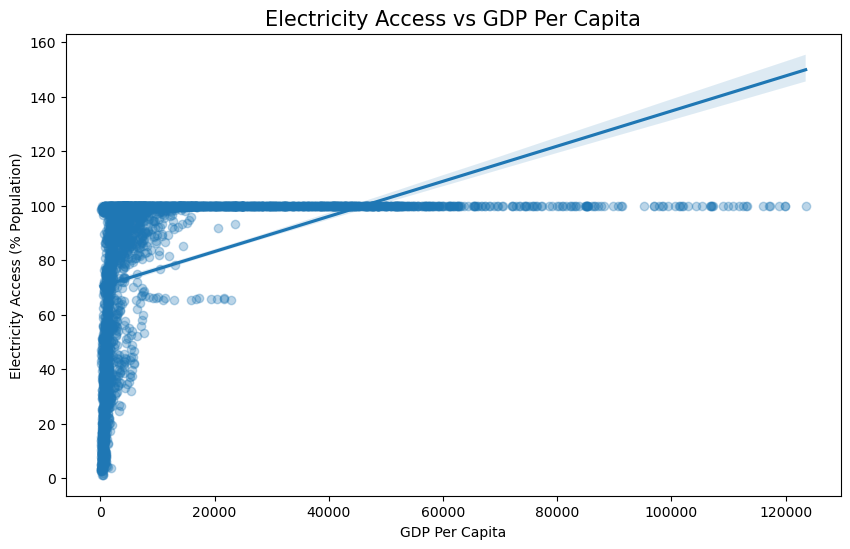

In [10]:
plt.figure(figsize=(10,6))
sns.regplot(x='gdp_per_capita', y='Access to electricity (% of population)', data=df, scatter_kws={'alpha':0.3})
plt.title('Electricity Access vs GDP Per Capita', size=15)
plt.xlabel('GDP Per Capita')
plt.ylabel('Electricity Access (% Population)')

# Scatterplot of Renewable Share vs GDP Growth

Text(0, 0.5, 'Renewable Share (%)')

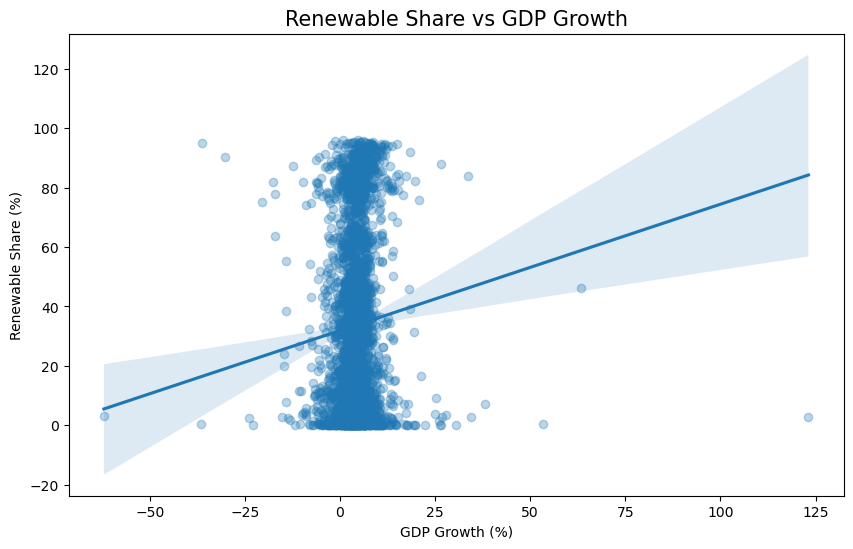

In [11]:
plt.figure(figsize=(10,6))
sns.regplot(x='gdp_growth', y='Renewable energy share in the total final energy consumption (%)', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable Share vs GDP Growth', size=15)
plt.xlabel('GDP Growth (%)')
plt.ylabel('Renewable Share (%)')

# Scatterplot of Renewable Share vs Electricity Access

Text(0, 0.5, 'Electricity Access (% Population)')

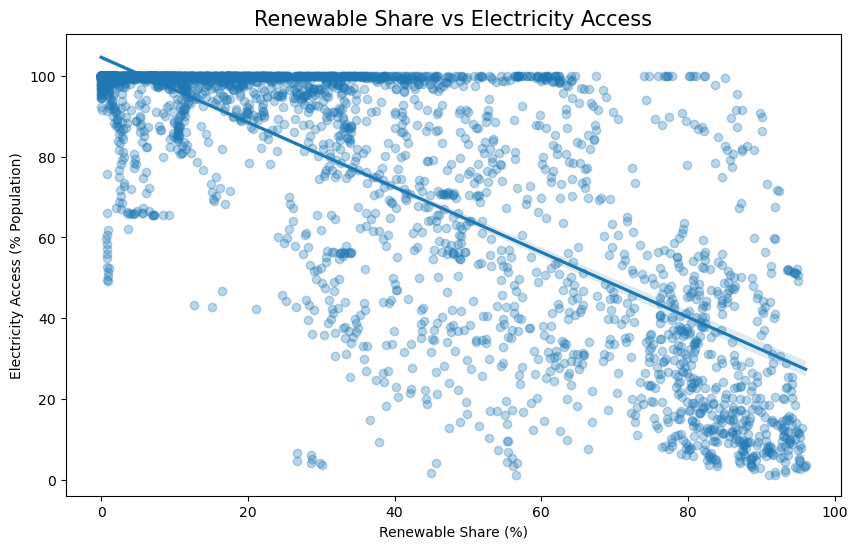

In [12]:
plt.figure(figsize=(10,6))
sns.regplot(x='Renewable energy share in the total final energy consumption (%)', y='Access to electricity (% of population)', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable Share vs Electricity Access', size=15)
plt.xlabel('Renewable Share (%)')
plt.ylabel('Electricity Access (% Population)')

# Electricity Access over Time

Text(0, 0.5, 'Electricity Access (% Population)')

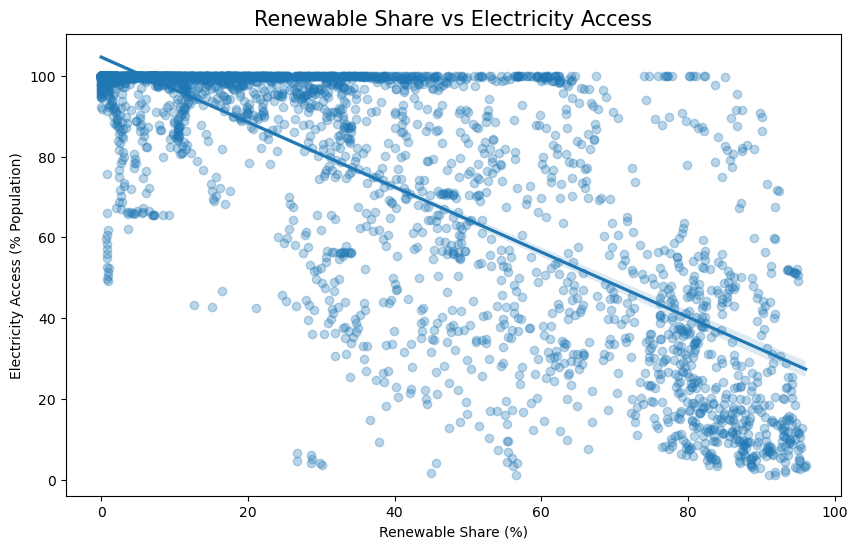

In [13]:
plt.figure(figsize=(10,6))
sns.regplot(x='Renewable energy share in the total final energy consumption (%)', y='Access to electricity (% of population)', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable Share vs Electricity Access', size=15)
plt.xlabel('Renewable Share (%)')
plt.ylabel('Electricity Access (% Population)')

# Renewable Share Over Time

Text(0, 0.5, 'Renewable Share (%)')

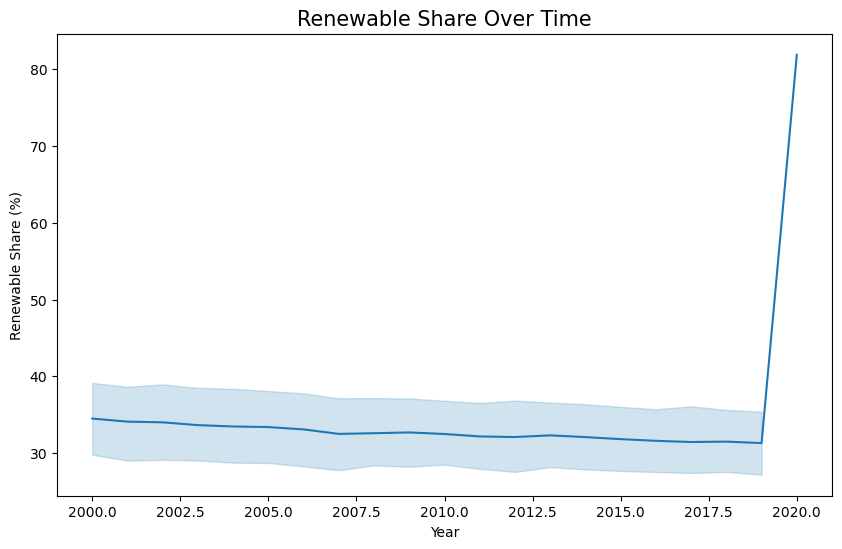

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Renewable energy share in the total final energy consumption (%)', data=df)
plt.title('Renewable Share Over Time', size=15)
plt.xlabel('Year')
plt.ylabel('Renewable Share (%)')